In [3]:
import rtde_control
import rtde_receive
import pyrealsense2 as rs
import numpy as np
import sys
import yaml
sys.path.append("../")

from SurfaceContact.move import move_default_pose
from SurfaceContact.control import SurfaceContactControl

%load_ext autoreload
%autoreload 2

In [12]:
with open('../config/pose_in_TCP_frame.yaml','r') as f:
    poses = yaml.safe_load(f)

    camera_2_tcp = poses['camera']
    probe_2_tcp = poses['probe']

In [7]:
# from recording_upload_server import CaptureServer

rtde_c = rtde_control.RTDEControlInterface("192.168.1.2")
rtde_r = rtde_receive.RTDEReceiveInterface("192.168.1.2")



In [8]:
pipeline = rs.pipeline()
pipeline.start()


In [9]:
move_default_pose(rtde_c)

In [10]:
from matplotlib import pyplot as plt

In [13]:

body_color_rgb = (227,124,100)
body_hsv_rad = (5,50,100)
# rtde_c = rtde_r = []
sc = SurfaceContactControl(pipeline,rtde_c,rtde_r,
                           camera_2_tcp,probe_2_tcp,
                           body_color_rgb,body_hsv_rad)

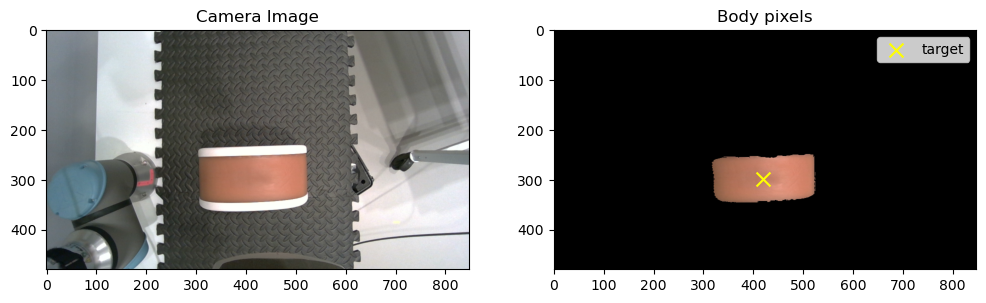

In [20]:
sc.fetchCameraStreamData()
fig = plt.figure(dpi=100,figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sc.showScene([ax1,ax2])


In [21]:
sc.mainloop()

0.002219508945596592

In [ ]:
# Script for saving default pose
with open('../config/default_pose.yaml','w') as f:
    yaml.safe_dump({'default_pose':rtde_r.getActualTCPPose()},f)

In [22]:
pipeline.stop()